# Practica 40 Limpieza de datos con pandas sobre archivos JSON  
## Responder las preguntas propuestas.  
### Aquellas preguntas que ya están respondidas debe explicar el código.

**El archivo JSON `allcandidatenewssample.json` contiene información sobre noticias y artículos relacionados con varias figuras políticas y eventos de campaña. Cada entrada en el JSON representa un artículo o noticia y contiene los siguientes campos:**

`title`: El título del artículo.  

`url`: La URL del artículo.  

`source`: La fuente del artículo, es decir, el medio de comunicación que lo publicó.  

`time`: La hora o tiempo relativo en que se publicó el artículo.  

`date`: La fecha de publicación del artículo en formato de marca de tiempo (timestamp).  

`query`: El tema o figura política relacionada con el artículo.  

`story_position`: La posición de la historia (en una lista de noticias o resultados).  

`panel_position`: La posición en un panel (en la presentación en una página web).  

`domain`: El dominio de la fuente del artículo.  

`category`: La categoría del artículo.  

**Este archivo almacena metadatos sobre varios artículos de noticias políticos, permitiendo análisis sobre la cobertura mediática, la frecuencia de artículos sobre ciertos temas o figuras políticas, y la distribución de fuentes de noticias.**


In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import pprint
import matplotlib as plt
from collections import Counter
import matplotlib.pyplot as plt


## Análisis con Python clásico  
**Explicar aquellos códigos cuyas preguntas que ya están resueltas**

### Cargar los datos JSON y buscar posibles problemas  
**Utilice el método `json.load` para devolver datos sobre noticias sobre candidatos políticos. `load` devuelve una lista de diccionarios**

In [393]:
with open('allcandidatenewssample.json') as f:
  candidatenews = json.load(f)

### Utilice `len` para obtener el tamaño de la lista, que en este caso es el número total de noticias. (Cada elemento de la lista es un diccionario con claves para el título, la fuente, etc., y sus respectivos valores).

In [394]:
len(candidatenews)

60000

### Utiliza pprint para mostrar los dos primeros diccionarios:

In [395]:
pprint.pprint(candidatenews[0:4]) 

[{'date': '2019-12-25 10:00:00',
  'domain': 'www.nbcnews.com',
  'panel_position': 1,
  'query': 'Michael Bloomberg',
  'source': 'NBC News',
  'story_position': 6,
  'time': '18 hours ago',
  'title': 'Bloomberg cuts ties with company using prison inmates to make '
           'campaign calls',
  'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971'},
 {'date': '2019-11-09 08:00:00',
  'domain': 'www.townandcountrymag.com',
  'panel_position': 1,
  'query': 'Amy Klobuchar',
  'source': 'Town & Country Magazine',
  'story_position': 3,
  'time': '18 hours ago',
  'title': "Democratic Candidates React to Michael Bloomberg's Potential Run",
  'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/'},
 {'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-08 06:00:00',
  'domain': 'thehill.com',
  'panel_position'

### Obtenga el valor de la clave de origen para el primer elemento de la lista:

In [396]:
pprint.pprint(candidatenews[0]['source'])

'NBC News'


## Comprobar si existen diferencias en la estructura de los diccionarios.  
### Utiliza `counter` para comprobar si hay algún diccionario en la lista con menos, o más, de los 9 pares `clave:valor` normales. Mira algunos de los diccionarios que casi no tienen datos (los que sólo tienen dos claves) antes de eliminarlos. 

In [397]:
Counter([len(item) for item in candidatenews])

Counter({9: 57202, 2: 2382, 10: 416})

In [398]:
pprint.pprint(next(item for item in candidatenews if len(item)<9))

{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'}


In [399]:
pprint.pprint(next(item for item in candidatenews if len(item)>9))

{'category': 'Satire',
 'date': '2019-08-21 04:00:00',
 'domain': 'politics.theonion.com',
 'panel_position': 1,
 'query': 'John Hickenlooper',
 'source': 'Politics | The Onion',
 'story_position': 8,
 'time': '4 days ago',
 'title': '‘And Then There Were 23,’ Says Wayne Messam Crossing Out '
          'Hickenlooper Photo \n'
          'In Elaborate Grid Of Rivals',
 'url': 'https://politics.theonion.com/and-then-there-were-23-says-wayne-messam-crossing-ou-1837311060'}


In [400]:
pprint.pprint([item for item in candidatenews if len(item)==2][0:10])

[{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-07-24 00:00:00', 'reason': 'No Top stories'},
 {'date': '2019-08-19 20:00:00', 'reason': 'Not collected'},
 {'date': '2019-09-13 16:00:00', 'reason': 'Not collected'},
 {'date': '2019-10-16 20:00:00', 'reason': 'No Top stories'},
 {'date': '2019-10-17 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-02 14:00:00', 'reason': 'Not collected'},
 {'date': '2019-05-27 12:00:00', 'reason': 'Not collected'},
 {'date': '2019-12-03 12:00:00', 'reason': 'No Top stories'},
 {'date': '2019-01-03 00:00:00', 'reason': 'No Top stories'}]


### Confirme que la lista de diccionarios restante tiene la longitud esperada: 60000-2382=57618:

In [401]:
candidatenews = [item for item in candidatenews if len(item)>2]
len(candidatenews)

57618

## Generar recuentos a partir de los datos JSON.  
### Obtenga los diccionarios sólo para `Político` (un sitio web que cubre noticias políticas) y muestre un par de diccionarios:

In [402]:
politico = [item for item in candidatenews if item.get("source") == "Politico"]
len(politico)

2732

In [403]:
pprint.pprint(politico[0:2])

[{'date': '2019-05-18 18:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Marianne Williamson',
  'source': 'Politico',
  'story_position': 7,
  'time': '1 week ago',
  'title': 'Marianne Williamson reaches donor threshold for Dem debates',
  'url': 'https://www.politico.com/story/2019/05/09/marianne-williamson-2020-election-1315133'},
 {'date': '2018-12-27 06:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Julian Castro',
  'source': 'Politico',
  'story_position': 1,
  'time': '1 hour ago',
  'title': "O'Rourke and Castro on collision course in Texas",
  'url': 'https://www.politico.com/story/2018/12/27/orourke-julian-castro-collision-texas-election-1073720'}]


## Obtenga los datos de `source` y confirme que tienen la longitud prevista.  
### Mostrar los primeros elementos de la nueva lista sources. 

In [404]:
sources = [item.get('source') for item in candidatenews if 'source' in item]
type(sources)

list

In [405]:
len(sources)

57618

In [406]:
sources[0:5]

['NBC News', 'Town & Country Magazine', 'TheHill', 'CNBC.com', 'Fox News']

### Generar un recuento de noticias por fuente y muestra las 10 fuentes más populares. Observe que las noticias de The Hill pueden tener TheHill (sin espacio) o The Hill como valor para la fuente :

In [407]:
pprint.pprint(Counter(sources).most_common(10))

[('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('TheHill', 2383),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('The Hill', 1342),
 ('New York Post', 1275),
 ('Vox', 941)]


## Corrige cualquier error en los valores del diccionario.

### Corrige los valores de la 'source' `The Hill` . Observe que `The Hill` es ahora la fuente fuente más frecuente de noticias:

In [408]:
for newsdict in candidatenews:
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
sources = [item.get('source') for item in candidatenews]
pprint.pprint(Counter(sources).most_common(10))

[('The Hill', 3725),
 ('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('New York Post', 1275),
 ('Vox', 941),
 ('Breitbart', 799)]


# Análisis del archivo json con Pandas

## Crear un dataframe de Pandas  
### 1- Pase los datos JSON al método pandas DataFrame.

In [409]:
df = pd.json_normalize(candidatenews)

display(df)

,title,url,source,time,date,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57618 entries, 0 to 57617
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           57618 non-null  object
 1   url             57618 non-null  object
 2   source          57618 non-null  object
 3   time            57618 non-null  object
 4   date            57618 non-null  object
 5   query           57618 non-null  object
 6   story_position  57618 non-null  int64 
 7   panel_position  57618 non-null  object
 8   domain          57618 non-null  object
 9   category        416 non-null    object
dtypes: int64(1), object(9)
memory usage: 4.4+ MB


In [411]:
df.dtypes

title             object
url               object
source            object
time              object
date              object
query             object
story_position     int64
panel_position    object
domain            object
category          object
dtype: object

### 2- Convierta la columna date a un tipo de datos datetime:

In [412]:
df['date'] = pd.to_datetime(df['date'])

print(df.dtypes)

title                     object
url                       object
source                    object
time                      object
date              datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object


### 3- Cambiar el nombre de la columna `date` por `storydate`:

In [413]:
df.rename(columns={
    'date': 'storydate'  # Rename the 'date' column to'storydate' for clarity and consistency.
    }, inplace=True
)


### 4- Cambiar el dtype de la columna `storydate` por `datetiem64[ns]`

In [414]:
df.dtypes

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object

### 5- Nuestre los tipos de datos

In [415]:
display(df.head(3))

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN


### 6- Dimensiones del dataframe (shape)

In [416]:
df.shape

(57618, 10)

### 7- Muestra las 10 fuentes (sources) más comunes en el DataFrame `candidatenewsdf` con pandas, junto con el número de veces que cada fuente aparece.

In [417]:
top_sources = df['source'].value_counts().head(10)
print("Las 10 fuentes más comunes:\n")
print(top_sources)

Las 10 fuentes más comunes:

source
The Hill               3725
Fox News               3530
CNN.com                2750
Politico               2732
The New York Times     1804
Washington Post        1770
Washington Examiner    1655
New York Post          1275
Vox                     941
Breitbart               799
Name: count, dtype: int64


### 8- Mostrar las primeras 5 filas del DataFrame

In [418]:
df.head(5)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN


### 9- Mostrar las ultimas 15 lineas del dataframe

In [419]:
df.tail(15)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
57603,Michael Bennet to open fundraisers to press,https://www.politico.com/news/2019/12/19/benne...,Politico,10 hours ago,2019-12-20 04:00:00,Michael Bennet,1,1,www.politico.com,NaN
57604,Paul Tudor Jones: Trump is 'the greatest sales...,https://finance.yahoo.com/news/paul-tudor-jone...,Yahoo Finance,26 mins ago,2019-11-06 10:00:00,Donald Trump,4,1,finance.yahoo.com,NaN
57605,"What ""The West Wing"" reveals about Joe Biden",https://www.cnn.com/2019/06/15/opinions/joe-bi...,CNN.com,3 hours ago,2019-06-15 18:00:00,Joe Biden,1,1,www.cnn.com,NaN
57606,"Delaney: ""I'm planning on staying in""",https://www.msnbc.com/david-gura/watch/delaney...,MSNBC.com,3 days ago,2019-08-28 14:00:00,John Delaney,9,1,www.msnbc.com,NaN
57607,Sen. Kamala Harris introduces bill to lengthen...,https://www.cnbc.com/2019/11/06/sen-kamala-har...,CNBC.com,48 mins ago,2019-11-06 14:00:00,Kamala Harris,3,1,www.cnbc.com,NaN
57608,Wayne Messam: Money Kept Me Out of the First D...,http://fortune.com/2019/06/25/wayne-messam-dem...,Fortune,3 days ago,2019-06-29 04:00:00,Wayne Messam,5,1,fortune.com,NaN
57609,Billionaire Tom Steyer raises $2 million for W...,https://www.winchesterstar.com/associated_pres...,The Winchester Star,19 hours ago,2019-10-11 10:00:00,Tom Steyer,6,1,www.winchesterstar.com,NaN
57610,"Ilhan Omar, Kamala Harris Respond To “Send Her...",https://deadline.com/2019/07/ilhan-omar-politi...,Deadline,14 hours ago,2019-07-18 14:00:00,Kamala Harris,2,1,deadline.com,NaN
57611,Kamala Harris Attended LA Fundraisers The Same...,https://www.thedailybeast.com/kamala-harris-at...,The Daily Beast,18 hours ago,2019-08-31 10:00:00,Kamala Harris,4,1,www.thedailybeast.com,NaN
57612,Northern Iowa voters tell presidential candida...,https://www.desmoinesregister.com/story/news/e...,Des Moines Register,2 hours ago,2019-11-26 22:00:00,Amy Klobuchar,3,1,www.desmoinesregister.com,NaN


### 10- Filtrar los artículos donde la fuente (source) es "Politico"

In [420]:
source_politico = df[df['source'] == 'Politico'] 

display(source_politico)

print('\nEn total son:', source_politico.shape[0], 'artículos con fuente Politico')

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
22,Marianne Williamson reaches donor threshold fo...,https://www.politico.com/story/2019/05/09/mari...,Politico,1 week ago,2019-05-18 18:00:00,Marianne Williamson,7,1,www.politico.com,NaN
95,O'Rourke and Castro on collision course in Texas,https://www.politico.com/story/2018/12/27/orou...,Politico,1 hour ago,2018-12-27 06:00:00,Julian Castro,1,1,www.politico.com,NaN
208,Democrats try out their Spanish on TV as they ...,https://www.politico.com/story/2019/06/25/demo...,Politico,23 hours ago,2019-06-26 18:00:00,Kamala Harris,8,1,www.politico.com,NaN
224,Pennsylvania suburbs revolt against Trump,https://www.politico.com/news/2019/11/06/penns...,Politico,2 hours ago,2019-11-07 00:00:00,Donald Trump,2,1,www.politico.com,NaN
234,Beto O'Rourke in talks with strategists ahead ...,https://www.politico.com/story/2019/02/15/beto...,Politico,12 hours ago,2019-02-16 06:00:00,Beto O Rourke,3,1,www.politico.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57384,This Republican Is Running Against Donald Trum...,https://www.politico.com/magazine/story/2019/0...,Politico,1 month ago,2019-06-28 12:00:00,Bill Weld,8,1,www.politico.com,NaN
57388,Steve Bullock: Trump reelection 'more likely w...,https://www.politico.com/story/2019/08/07/stev...,Politico,6 days ago,2019-08-14 08:00:00,Steve Bullock,9,1,www.politico.com,NaN
57550,Democrat Bennet sounds caution on impeachment ...,https://www.politico.com/news/2019/09/27/micha...,Politico,12 hours ago,2019-09-27 18:00:00,Michael Bennet,1,1,www.politico.com,NaN
57551,Marianne Williamson qualifies for 2020 Democra...,https://www.politico.com/story/2019/05/23/mari...,Politico,1 week ago,2019-06-02 18:00:00,Marianne Williamson,5,1,www.politico.com,NaN



En total son: 2732 artículos con fuente Politico


### 11- Filtrar los artículos publicados después del 1 de enero de 2020

In [421]:
articulos_desde_2020 = df[df['storydate'] > '2020-01-01'] 

display(articulos_desde_2020)

print('\nEn total son:', articulos_desde_2020.shape[0], 'artículos después del primero de enero del 2020')

,title,url,source,time,storydate,query,story_position,panel_position,domain,category



En total son: 0 artículos después del primero de enero del 2020


In [422]:
df['storydate'].min() 

Timestamp('2018-12-16 00:00:00')

In [423]:
df['storydate'].max() #Confirmo que la fecha maxima de los artículos es 2019-12-30 y no hay para el 2020

Timestamp('2019-12-30 22:00:00')

In [424]:
articulos_desde_2019 = df[df['storydate'] > '2019-01-01'] 

display(articulos_desde_2019)

print('\nEn total son:', articulos_desde_2019.shape[0], 'artículos después del primero de enero del 2019')

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN



En total son: 56752 artículos después del primero de enero del 2019


### 12- Filtrar y mostrar los artículos de "CNN.com"

In [425]:

articulos_cnn = df[df['source'] == 'CNN.com'] 

display(articulos_cnn)

print('\nEn total son:', articulos_cnn.shape[0], 'artículos de CNN.com')


,title,url,source,time,storydate,query,story_position,panel_position,domain,category
16,Bernie Sanders stays on the stump after receiv...,https://www.cnn.com/2019/03/15/politics/bernie...,CNN.com,1 hour ago,2019-03-16 06:00:00,Bernie Sanders,1,1,www.cnn.com,NaN
17,Trump says he spoke with Putin about 'Russian ...,https://www.cnn.com/2019/05/03/politics/trump-...,CNN.com,4 hours ago,2019-05-04 18:00:00,Donald Trump,9,1,www.cnn.com,NaN
30,McConnell will move to acquit Trump if he's im...,https://www.cnn.com/2019/12/11/politics/mcconn...,CNN.com,6 hours ago,2019-12-12 14:00:00,Donald Trump,1,1,www.cnn.com,NaN
61,Here's what Sanford said about voting for Trum...,https://www.cnn.com/2019/08/18/politics/mark-s...,CNN.com,2 hours ago,2019-08-18 18:00:00,Donald Trump,1,1,www.cnn.com,NaN
103,First on CNN: Respected foreign policy veteran...,https://www.cnn.com/2019/07/21/politics/nichol...,CNN.com,18 hours ago,2019-07-22 22:00:00,Joe Biden,7,1,www.cnn.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57544,Joe Biden tops Democratic field with $6.3 mill...,https://www.cnn.com/2019/04/26/politics/biden-...,CNN.com,58 mins ago,2019-04-26 18:00:00,Joe Biden,7,1,www.cnn.com,NaN
57560,"Trump in 'very good health,' physician says",https://www.cnn.com/2019/02/08/politics/trump-...,CNN.com,3 hours ago,2019-02-09 00:00:00,Donald Trump,1,1,www.cnn.com,NaN
57578,Pete Buttigieg's minority problem isn't just a...,https://www.cnn.com/2019/11/24/politics/pete-b...,CNN.com,2 hours ago,2019-11-24 10:00:00,Pete Buttigieg,3,1,www.cnn.com,NaN
57598,Biden camp responds after Giuliani's canceled ...,https://www.cnn.com/2019/05/11/politics/biden-...,CNN.com,8 hours ago,2019-05-12 06:00:00,Joe Biden,3,1,www.cnn.com,NaN



En total son: 2750 artículos de CNN.com


### 13- Contar los valores nulos en cada columna

In [426]:
print(df.isna().sum()) #Para cada columna 


title                 0
url                   0
source                0
time                  0
storydate             0
query                 0
story_position        0
panel_position        0
domain                0
category          57202
dtype: int64


In [427]:
print(df.isnull().sum(axis=1)) #para las filas 

0        1
1        1
2        1
3        1
4        1
        ..
57613    1
57614    1
57615    1
57616    1
57617    1
Length: 57618, dtype: int64


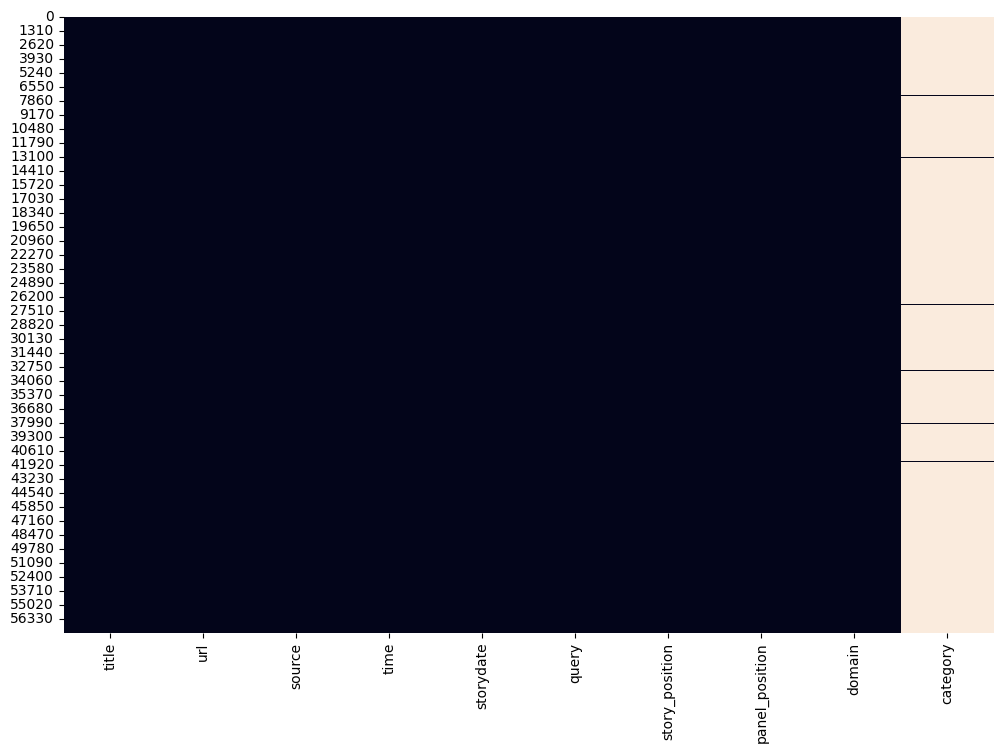

In [428]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### 14- Eliminar filas con valores nulos en la columna "title"

In [429]:
# la columna title no tiene nulos,, no elimino nada

### 15- Rellenar valores nulos en la columna "category" con "Unknown"

In [430]:
df['category'].fillna('Unknown', inplace=True)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_17220\190213893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].fillna('Unknown', inplace=True)


In [431]:
df.head()

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,Unknown


### 16- Convertir la columna "panel_position" a tipo float

In [432]:
df.dtypes

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object

In [433]:
# Converte pero trata 'N/A' como NaN
df['panel_position'] = pd.to_numeric(df['panel_position'], errors='coerce')
df.dtypes

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position           float64
domain                    object
category                  object
dtype: object

### 17- Convertir la columna "storydate" a tipo string

In [434]:
df['storydate'] = df['storydate'].astype(str)
df.dtypes

title              object
url                object
source             object
time               object
storydate          object
query              object
story_position      int64
panel_position    float64
domain             object
category           object
dtype: object

### 18- Obtener la media de "story_position"

In [435]:
df['story_position'].mean()

5.249626852719636

### 19- Obtener la desviación estándar de "story_position"

In [436]:
df['story_position'].std()

2.889001922195634

### 20- Obtener la cantidad de artículos por fuente (source)

In [437]:
df['source'].value_counts()

source
The Hill               3725
Fox News               3530
CNN.com                2750
Politico               2732
The New York Times     1804
                       ... 
WIS                       1
+972 Magazine             1
YakTriNews                1
KNIA KRLS                 1
The Winchester Star       1
Name: count, Length: 1723, dtype: int64

### 21- Obtener el valor mínimo y máximo de "story_position"

In [438]:
df['story_position'].min()

1

In [439]:
df['story_position'].max()

10

### 22- Agrupar por la columna "source" y contar el número de artículos

In [440]:
articles_by_source = df.groupby('source').size().sort_values(ascending=False)
print(articles_by_source)

source
The Hill                       3725
Fox News                       3530
CNN.com                        2750
Politico                       2732
The New York Times             1804
                               ... 
KMOX Radio                        1
KMPH.com                          1
KMTV - 3 News Now                 1
The Fulcrum                       1
Monadnock Ledger Transcript       1
Length: 1723, dtype: int64


### 23- Crear una tabla pivot para analizar la posición de los artículos por fuente

In [441]:
pivot_table = df.pivot_table(values='story_position', index='source', aggfunc='mean')
display(pivot_table.head())

,story_position
source,
,4.50
+972 Magazine,7.00
1010 Wins - Radio.com,7.52
1011 News,2.00
1011Now,2.00


### 24- Agrupar por "storydate" y contar el número de artículos por día

In [442]:
articles_by_date = df.groupby('storydate').size()
print(articles_by_date.head(10))

storydate
2018-12-16 00:00:00    20
2018-12-16 06:00:00    21
2018-12-16 12:00:00    15
2018-12-16 18:00:00    18
2018-12-17 00:00:00    16
2018-12-17 06:00:00    15
2018-12-17 12:00:00    18
2018-12-17 18:00:00    17
2018-12-18 00:00:00    24
2018-12-18 06:00:00    15
dtype: int64


### 25- Graficar el número de artículos por las 10 principales fuentes (explicar código)

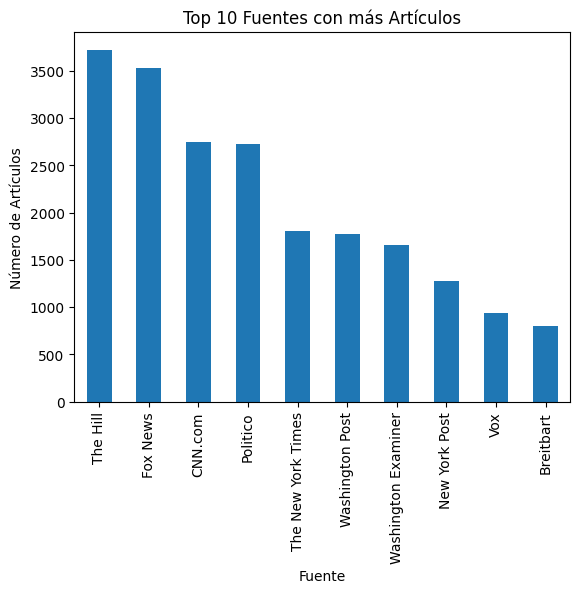

In [443]:
top_sources = df['source'].value_counts().head(10)
top_sources.plot(kind='bar')
plt.title('Top 10 Fuentes con más Artículos')
plt.xlabel('Fuente')
plt.ylabel('Número de Artículos')
plt.show()

### 26- Graficar la distribución de "story_position"

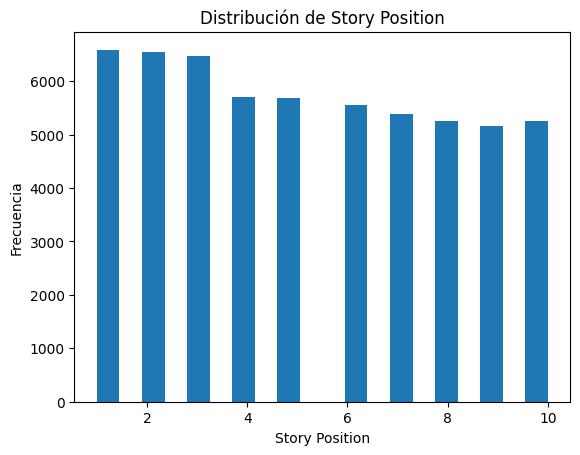

In [444]:
df['story_position'].plot(kind='hist', bins=20)
plt.title('Distribución de Story Position')
plt.xlabel('Story Position')
plt.ylabel('Frecuencia')
plt.show()

### 27- Convertir la columna "storydate" a formato datetime

In [445]:
df['storydate'] = pd.to_datetime(df['storydate'])
df.head(3)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown


### 28- Crear una nueva columna con el año de "storydate"

In [446]:
df['year'] = df['storydate'].dt.year

### 29- Crear una nueva columna con el mes de "storydate"

In [447]:
df['month'] = df['storydate'].dt.month

In [448]:
df.tail(3)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year,month
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown,2019,9
57617,Kamala Harris demands answers on California pr...,https://www.sacbee.com/news/state/california/a...,The Sacramento Bee,18 hours ago,2019-08-06 02:00:00,Kamala Harris,9,1.0,www.sacbee.com,Unknown,2019,8


### 30- Convertir el DataFrame filtrado de "CNN.com" a formato JSON

In [449]:
articulos_cnn.shape

(2750, 10)

In [450]:
json_cnn_data = articulos_cnn.to_json(orient='records')

print(json_cnn_data)

[{"title":"Bernie Sanders stays on the stump after receiving stitches for head wound","url":"https:\/\/www.cnn.com\/2019\/03\/15\/politics\/bernie-sanders-stitches-south-carolina\/index.html","source":"CNN.com","time":"1 hour ago","storydate":1552716000000,"query":"Bernie Sanders","story_position":1,"panel_position":1,"domain":"www.cnn.com","category":null},{"title":"Trump says he spoke with Putin about 'Russian hoax,' didn't warn him \nagainst 2020 election meddling","url":"https:\/\/www.cnn.com\/2019\/05\/03\/politics\/trump-putin-phone-call-mueller-report\/index.html","source":"CNN.com","time":"4 hours ago","storydate":1556992800000,"query":"Donald Trump","story_position":9,"panel_position":1,"domain":"www.cnn.com","category":null},{"title":"McConnell will move to acquit Trump if he's impeached, not merely dismiss \ncharges, 2 Republican senators say","url":"https:\/\/www.cnn.com\/2019\/12\/11\/politics\/mcconnell-impeachment-trial-acquittal\/index.html","source":"CNN.com","time":"6

### 31- Exportar el DataFrame filtrado de "CNN.com" a un archivo CSV

In [451]:
df_cnn = pd.read_json(json_cnn_data)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_17220\1121547418.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_cnn = pd.read_json(json_cnn_data)


In [452]:
df_cnn

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bernie Sanders stays on the stump after receiv...,https://www.cnn.com/2019/03/15/politics/bernie...,CNN.com,1 hour ago,1552716000000,Bernie Sanders,1,1,www.cnn.com,NaN
1,Trump says he spoke with Putin about 'Russian ...,https://www.cnn.com/2019/05/03/politics/trump-...,CNN.com,4 hours ago,1556992800000,Donald Trump,9,1,www.cnn.com,NaN
2,McConnell will move to acquit Trump if he's im...,https://www.cnn.com/2019/12/11/politics/mcconn...,CNN.com,6 hours ago,1576159200000,Donald Trump,1,1,www.cnn.com,NaN
3,Here's what Sanford said about voting for Trum...,https://www.cnn.com/2019/08/18/politics/mark-s...,CNN.com,2 hours ago,1566151200000,Donald Trump,1,1,www.cnn.com,NaN
4,First on CNN: Respected foreign policy veteran...,https://www.cnn.com/2019/07/21/politics/nichol...,CNN.com,18 hours ago,1563832800000,Joe Biden,7,1,www.cnn.com,NaN
...,...,...,...,...,...,...,...,...,...,...
2745,Joe Biden tops Democratic field with $6.3 mill...,https://www.cnn.com/2019/04/26/politics/biden-...,CNN.com,58 mins ago,1556301600000,Joe Biden,7,1,www.cnn.com,NaN
2746,"Trump in 'very good health,' physician says",https://www.cnn.com/2019/02/08/politics/trump-...,CNN.com,3 hours ago,1549670400000,Donald Trump,1,1,www.cnn.com,NaN
2747,Pete Buttigieg's minority problem isn't just a...,https://www.cnn.com/2019/11/24/politics/pete-b...,CNN.com,2 hours ago,1574589600000,Pete Buttigieg,3,1,www.cnn.com,NaN
2748,Biden camp responds after Giuliani's canceled ...,https://www.cnn.com/2019/05/11/politics/biden-...,CNN.com,8 hours ago,1557640800000,Joe Biden,3,1,www.cnn.com,NaN


### 32- Mostrar los artículos con la mayor "story_position" por fuente

In [453]:
df_cnn['storydate'] = pd.to_datetime(df_cnn['storydate'], unit='ms')

# Mostrar los artículos con la mayor "story_position" por fuente
max_positions = df_cnn.groupby('source')['story_position'].max()
for source, max_position in max_positions.items():
    max_articles = df_cnn[(df_cnn['source'] == source) & (df_cnn['story_position'] == max_position)]
    print(f"\nFuente: {source}, Mayor story_position: {max_position}")
    display(max_articles)


Fuente: CNN.com, Mayor story_position: 10


,title,url,source,time,storydate,query,story_position,panel_position,domain,category
11,Tim Ryan says Trump's suggestion to tie gun co...,https://www.cnn.com/2019/08/05/politics/tim-ry...,CNN.com,1 week ago,2019-08-14 14:00:00,Tim Ryan,10,1,www.cnn.com,NaN
14,Evelyn Yang talks about husband's campaign in ...,https://www.cnn.com/videos/politics/2019/11/04...,CNN.com,2 days ago,2019-11-06 18:00:00,Andrew Yang,10,1,www.cnn.com,NaN
20,Amy Klobuchar qualifies for November Democrati...,https://www.cnn.com/2019/10/24/politics/amy-kl...,CNN.com,2 weeks ago,2019-11-05 06:00:00,Amy Klobuchar,10,1,www.cnn.com,NaN
26,Julian Castro says he is not interested in vic...,https://www.cnn.com/2019/02/06/politics/julian...,CNN.com,2 weeks ago,2019-02-23 12:00:00,Julian Castro,10,1,www.cnn.com,NaN
59,Moulton on Iraqi boy: 'I'll remember his face ...,https://www.cnn.com/2019/06/02/politics/moulto...,CNN.com,2 weeks ago,2019-06-17 06:00:00,Seth Moulton,10,1,www.cnn.com,NaN
...,...,...,...,...,...,...,...,...,...,...
2669,Rep. Tim Ryan says he's 'concerned' about more...,https://www.cnn.com/2019/04/17/politics/tim-ry...,CNN.com,1 day ago,2019-04-18 18:00:00,Tim Ryan,10,1,www.cnn.com,NaN
2679,Steve Bullock: A crazy idea to get things done...,https://www.cnn.com/2019/10/03/opinions/steve-...,CNN.com,5 days ago,2019-10-09 08:00:00,Steve Bullock,10,1,www.cnn.com,NaN
2691,"Tom Steyer learns, again, that money doesn't a...",https://www.cnn.com/2019/08/29/politics/tom-st...,CNN.com,21 hours ago,2019-08-30 16:00:00,Tom Steyer,10,1,www.cnn.com,NaN
2703,Beto O'Rourke to join march against wall count...,https://www.cnn.com/2019/02/08/politics/beto-o...,CNN.com,20 hours ago,2019-02-09 18:00:00,Beto O Rourke,10,1,www.cnn.com,NaN


### 33- Calcular el resumen estadístico de la columna "story_position"

In [457]:
df_cnn['story_position'].describe()

count    2750.000000
mean        5.205455
std         3.073545
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: story_position, dtype: float64

### 34- Calcular el conteo de valores únicos en la columna "query"

In [458]:
df_cnn['query'].value_counts() 

query
Donald Trump           379
Steve Bullock          158
Tim Ryan               151
Joe Biden              140
Pete Buttigieg         138
Marianne Williamson    134
Cory Booker            134
Amy Klobuchar          131
Kamala Harris          129
Beto O Rourke          123
Bernie Sanders         115
Julian Castro          113
Elizabeth Warren       110
Tom Steyer              83
Andrew Yang             80
Kirsten Gillibrand      74
John Hickenlooper       73
Bill Weld               70
Eric Swalwell           66
Tulsi Gabbard           65
Michael Bennet          54
Bill de Blasio          41
Seth Moulton            40
Jay Inslee              38
Michael Bloomberg       33
Howard Schultz          32
John Delaney            31
Deval Patrick            8
Wayne Messam             7
Name: count, dtype: int64

### 35- Calcular o contar los valores faltantes de cada columna

In [460]:
print(df_cnn.isna().sum())

title                0
url                  0
source               0
time                 0
storydate            0
query                0
story_position       0
panel_position       0
domain               0
category          2750
dtype: int64


### 36- Filtrar filas donde falta algún dato

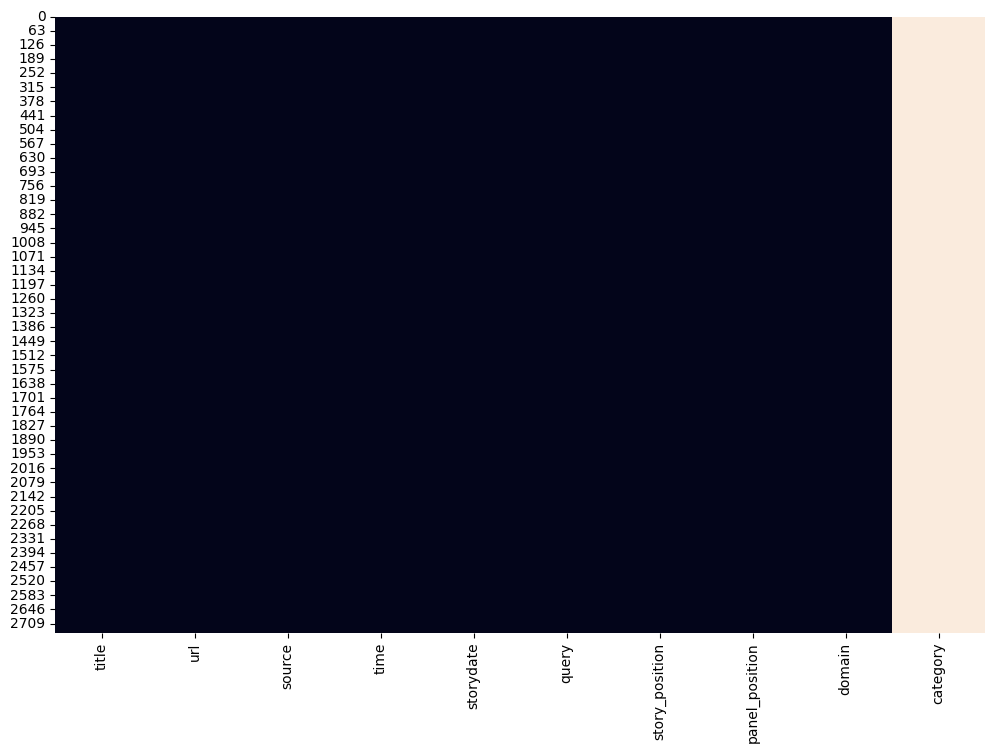

In [461]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cnn.isnull(), cbar=False)
plt.show()

In [463]:
df_cnn.isnull().sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
2745    1
2746    1
2747    1
2748    1
2749    1
Length: 2750, dtype: int64

### 37- Borrar la columna `category` del dataframe y guardarlo en otro dataframe

In [468]:
df_category = df['category']
print(df_category)
print('\nEl shape del datraframe category: ', df_category.shape)

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
57613    Unknown
57614    Unknown
57615    Unknown
57616    Unknown
57617    Unknown
Name: category, Length: 57618, dtype: object

El shape del datraframe category:  (57618,)


### 38- Filtrar filas donde la columna 'source' está vacía o es nula

In [469]:
df_source_filtrada = df_cnn[df_cnn['source'].isnull() | (df_cnn['source'] == '')]

print(df_source_filtrada)

Empty DataFrame
Columns: [title, url, source, time, storydate, query, story_position, panel_position, domain, category]
Index: []


### 39-  Eliminar filas donde la columna 'source' está vacía o es nula

In [ ]:
#No hay nulos 

### 40- Calcular la media de la columna story_position para cada query

In [470]:
df['story_position'].mean()

5.249626852719636